# Objective: Linear Regression for Transistors
Here, I'm going to build a linear regression model using PyTorch to predict the number of transistors per square inch on integrated circuits over time.

## Import Libraries

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data
This covers how to get the data and load the data into the code.

In [2]:
# get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-09-09 16:46:42--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-09-09 16:46:42 (11.2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [7]:
# load data
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

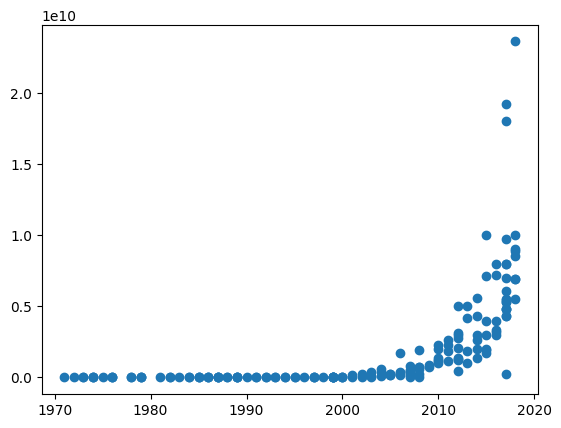

In [8]:
# plot data for visualization
plt.scatter(X, Y)

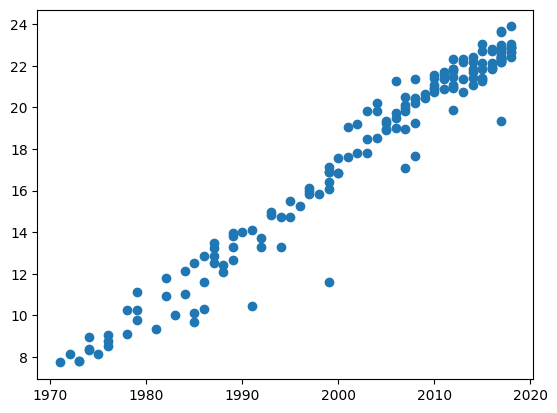

In [9]:
# plot the data in log scale for visualization
Y = np.log(Y)
plt.scatter(X, Y)

## Preprocess Data
This covers how to normalize the data and cast the data type for PyTorch.

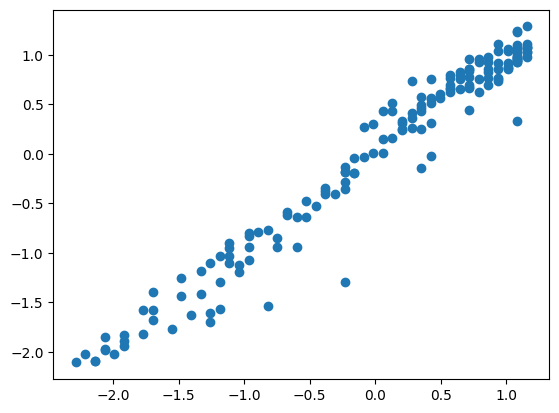

In [11]:
# normalize both X and Y
mean_x = X.mean()
std_x = X.std()
mean_y = Y.mean()
std_y = Y.std()
X_norm = (X - mean_x) / std_x
Y_norm = (Y - mean_y) / std_y

# plot the normalized data for visualization
plt.scatter(X_norm, Y_norm)

In [12]:
# cast type of data to float32 for PyTorch
X_norm = X_norm.astype(np.float32)
Y_norm = Y_norm.astype(np.float32)

## Build Model
This covers how to build a linear regression model for prediction with a choice of loss function and optimizer.

In [15]:
# create a linear regression model
model = nn.Linear(1, 1)

# loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)
# SGD = stochastic gradient descent 
# concept: https://www.youtube.com/watch?app=desktop&v=vMh0zPT0tLI
# usage: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
# momentum is to help the model deal with local minimum

In [16]:
# convert numpy data arrays into Torch tensors
inputs = torch.from_numpy(X_norm)
targets = torch.from_numpy(Y_norm)

## Training
This covers how to train the linear regression model with the input data that we normalized.

In [17]:
# train the model
epochs = 100
losses = []

for epoch in range(epochs):
    # zero the parameter gradients to make sure
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # save the loss
    losses.append(loss.item())
    
    # backward and optimize
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 1/100, Loss: 0.4453
Epoch 2/100, Loss: 0.4292
Epoch 3/100, Loss: 0.4029
Epoch 4/100, Loss: 0.3709
Epoch 5/100, Loss: 0.3367
Epoch 6/100, Loss: 0.3025
Epoch 7/100, Loss: 0.2698
Epoch 8/100, Loss: 0.2395
Epoch 9/100, Loss: 0.2120
Epoch 10/100, Loss: 0.1874
Epoch 11/100, Loss: 0.1658
Epoch 12/100, Loss: 0.1469
Epoch 13/100, Loss: 0.1306
Epoch 14/100, Loss: 0.1165
Epoch 15/100, Loss: 0.1044
Epoch 16/100, Loss: 0.0941
Epoch 17/100, Loss: 0.0854
Epoch 18/100, Loss: 0.0780
Epoch 19/100, Loss: 0.0717
Epoch 20/100, Loss: 0.0664
Epoch 21/100, Loss: 0.0619
Epoch 22/100, Loss: 0.0581
Epoch 23/100, Loss: 0.0550
Epoch 24/100, Loss: 0.0523
Epoch 25/100, Loss: 0.0501
Epoch 26/100, Loss: 0.0482
Epoch 27/100, Loss: 0.0466
Epoch 28/100, Loss: 0.0453
Epoch 29/100, Loss: 0.0442
Epoch 30/100, Loss: 0.0433
Epoch 31/100, Loss: 0.0425
Epoch 32/100, Loss: 0.0418
Epoch 33/100, Loss: 0.0413
Epoch 34/100, Loss: 0.0408
Epoch 35/100, Loss: 0.0404
Epoch 36/100, Loss: 0.0401
Epoch 37/100, Loss: 0.0399
Epoch 38/1

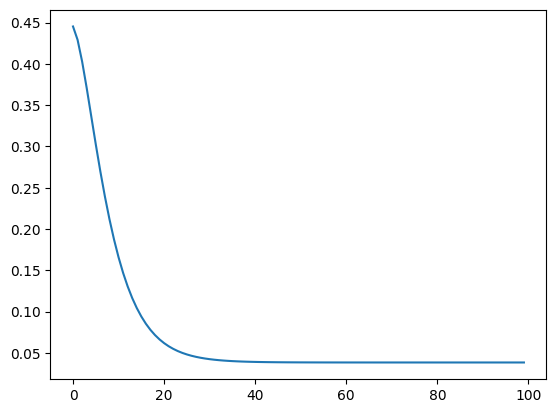

In [21]:
# plot the losses per epoch
plt.plot(range(epochs), losses)

## Result
This shows the result of the linear regression model in a line with the original data.

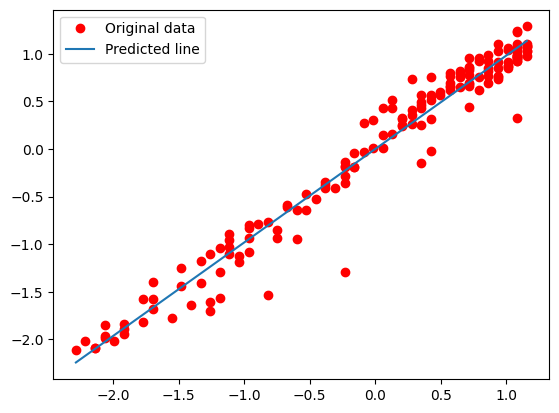

In [22]:
# plot the result with normalized data
predicted = model(torch.from_numpy(X_norm)).detach().numpy()
plt.plot(X_norm, Y_norm, 'ro', label='Original data')
plt.plot(X_norm, predicted, label='Predicted line')
plt.legend()
plt.show()

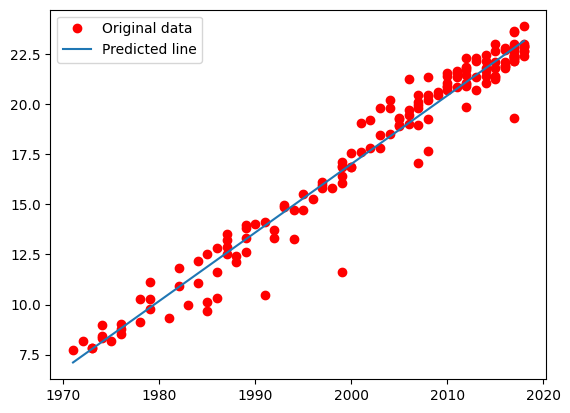

In [25]:
# plot the result in real log scale with original data
predicted_real = (predicted * std_y) + mean_y
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted_real, label='Predicted line')
plt.legend()
plt.show()